In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [8]:
    print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [12]:
y=y.reshape(len(y),1)

In [13]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc_X=StandardScaler()
sc_y=StandardScaler()

In [16]:
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [17]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [26]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [27]:
from sklearn.svm import SVR

In [28]:
regressor=SVR(kernel='rbf')

In [29]:
regressor.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

Text(0, 0.5, 'Salary')

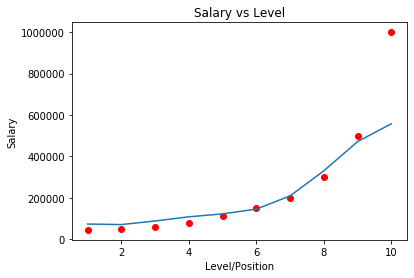

In [32]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)))
plt.title('Salary vs Level')
plt.xlabel('Level/Position')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

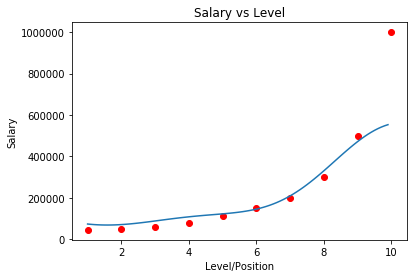

In [35]:
X_grid=np.arange(sc_X.inverse_transform(min(X)),sc_X.inverse_transform(max(X)),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))))
plt.title('Salary vs Level')
plt.xlabel('Level/Position')
plt.ylabel('Salary')